# Introdução

Para executar as simulações presentes nesse trabalho, utilizei *jupyter notebook*, que é uma IDE de Python para Data Science. Disponibilizerei o pdf gerado pelo notebook e também disponibilizarei o *.ipynb* caso solicitado, para que possa ser executado por qualquer um. Para isso algumas instruções:

1. Acesse qualquer interpretador .ipynb — o mais fácil é o google colab → https://colab.research.google.com/ — e faça o upload do arquivo;
2. Primeiro execute o último bloco desse notebook — lá no fim, chamado '*Funções feitas sob medida para simulação*' — para carregar as funções utilziadas ao longo das análises.

# <font  style='font-size: 30px;'> Produzindo sinais e parâmetros a partir dos dados
 </font> <hr style='border'>

A função abaixo carrega o nosso conjunto de dados em duas listas. Uma chamada 'tempo' e outra 'saida'. Essas duas variáveis são listas de arrays, ou seja, um conjunto de arrays de tempo e de saída. Esses arrays foram obtidos da massa de dados A5, obtida experimentalmente. Os dados A5 são continuamente obtidos, de forma que a variar um sinal de estímulo alternando de 6 para 7 e 7 para 6. Com isso, os arrays são obtidos no *toggle* desse sinal, a mudança marca a separação dos arrays.

Com isso, temos vários arrays que mostram a resposta ao degrau do sistema real. Mais detalhes, na definição da função no final do notebook

In [3]:
tempo, saida = obter_dados_estruturados('a5.csv')

Já a função 'obter_tabela_parametros', obtem os parâmetros de uma tabela de dados. Na prática, efetuamos os cálculos de parâmetros da resposta ao degrau e depois fazemos uma outra tabela de médias.

In [4]:
tabela = obter_tabela_parametros(tempo, saida)
tabela

,Valor Inicial,Valor Extremo,Valor Final,Tempo Pico,Delta Máximo,Delta Saída,Sobressinal (M_p),Coeficiente de Amortecimento (ζ),Frequência Natural não Amortecida (ω_d),Frequência Natural Amortecida (ω_n),Ganho
1,2.30,5.68,4.94,0.70,0.74,2.64,0.2803,0.3753,4.8418,4.4880,2.1478
2,5.04,1.52,2.47,0.80,0.95,2.57,0.3696,0.3020,4.1193,3.9270,0.4901
3,2.58,5.65,4.92,0.45,0.73,2.34,0.3120,0.3477,7.4458,6.9813,1.9070
4,5.01,1.50,2.45,0.75,0.95,2.56,0.3711,0.3009,4.3924,4.1888,0.4890
5,2.12,5.68,4.89,0.75,0.79,2.77,0.2852,0.3709,4.5104,4.1888,2.3066
6,4.98,1.48,2.47,0.80,0.99,2.51,0.3944,0.2839,4.0956,3.9270,0.4960
7,2.64,5.68,4.88,0.60,0.80,2.24,0.3571,0.3114,5.5100,5.2360,1.8485
8,4.95,1.57,2.43,0.70,0.86,2.52,0.3413,0.3238,4.7435,4.4880,0.4909
9,2.14,5.68,4.97,0.80,0.71,2.83,0.2509,0.4029,4.2906,3.9270,2.3224
10,5.08,1.51,2.49,0.80,0.98,2.59,0.3784,0.2955,4.1106,3.9270,0.4902


Agora, vamos tirar médias para algumas dessas colunas: $M_p, \zeta, \omega_d, \omega_n, k$.

In [5]:
tabela_medias = obter_tabela_medias(tabela)
tabela_medias

,Sobressinal,Coeficiente de Amortecimento (ζ),Frequência Natural não Amortecida (ω_d),Frequência Natural Amortecida (ω_n),Ganho
Média,0.3301,0.3346,4.7782,4.4971,1.3885
Valor Máximo,0.3944,0.4029,7.4458,6.9813,2.3224
Variação Máxima,0.0643,0.0683,2.6676,2.4842,0.9339


# <font  style='font-size: 30px;'> Resposta ao degrau da função transferência obtida dos cálculos da tabela
 </font> <hr style='line'>

Considerando a tabela acima — em anexos no ambiente —, obtemos as médias para nosso $\zeta$ (zeta, coeficiente de amortecimento) e $\omega_n$ (omega n, nossa frequência natural amortecida) e $k$ (constante de proporção).

$$
\zeta = 0.3346 \\
\omega_n = 4.4971 \\
k = 1.3885
$$

O que nos dá a seguinte função transferência:

$$
G(s) \approx 1.3885 \cdot \frac{20.223}{s^2 + 3s + 20.223}
$$

O que faremos agora, é gerar simulações de resposta ao degrau via biblioteca Control do python. Depois disso, pegaremos os valores reais do arquivo 'a5.csv' e produziremos o sinal equivalente de resposta ao degrau. Por fim, faremos uma comparação desses dois sinais.

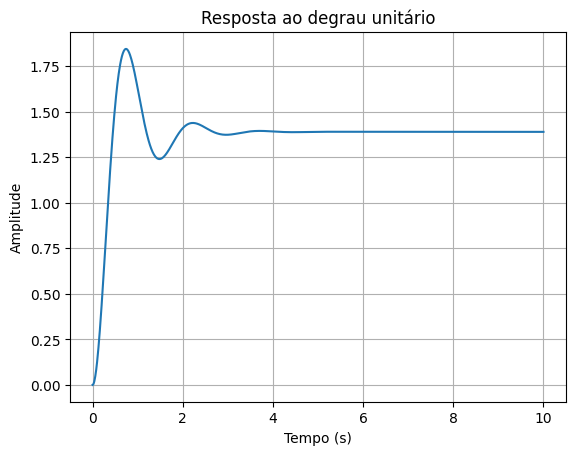

,Valor
RiseTime,0.2782
SettlingTime,2.5040
SettlingMin,1.2393
SettlingMax,1.8436
Overshoot,32.7759
Undershoot,0.0000
Peak,1.8436
PeakTime,0.7419
SteadyStateValue,1.3885
Erro(%),-0.3885


In [6]:
sistema, resposta = obter_resposta_degrau(zeta=0.3346, wn=4.4971, k=1.3885)
resposta

# <font style='font-size: 30px;'> Gerando sinal a partir dos dados de a5 (gerados experimentalmente)
 </font> <hr style='border'>

Amostra é um parâmetro de seleção das 13 amostras do dataset experimental. As amostras impares são saltos 6 → 7 , logo são mais interessantes, pois produzem degrais positivos. Para todos os valores de 1 a 12, você conseguirá aproximar o valor.

No plot dos dois sinais, nós precisamos levar em consideração que a simulação é feita de um salto unitário, já os dados empíricos são obtidos em saltos, que apesar de unitários, não começam de 0, por isso tivemos que adicionar aproximadamente 2.3 à saída y e 3.75 à o vetor tempo.

Abaixo, o melhor ajuste foi obtido com a variação máxima de ganho — $k=2.3224$, contra variação média de $k=1.3885$. Apesar disso, acredito que a função transferência está representando bem nosso sistema. Vamos seguir projetando compensadores para essa função.

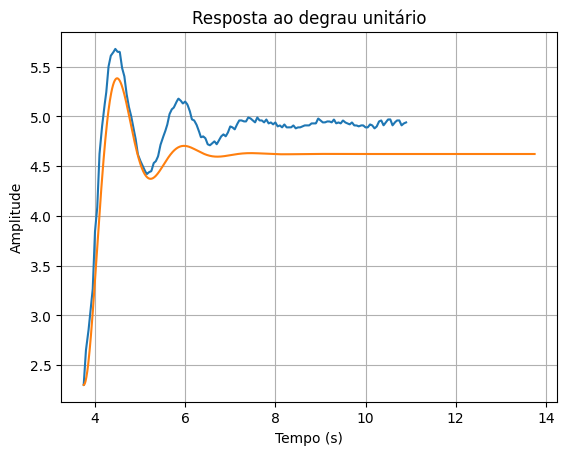

In [19]:
amostra = 1
_ = obter_resposta_degrau(zeta=0.3346, wn=4.4971, k=2.3224, t_real=tempo[amostra], y_real=saida[amostra])

# Funções feitas sob medida para simulação

In [14]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import pandas as pd
import numpy as np
import control as ct


def obter_dados_estruturados(nome_arquivo):
    
    # Carrega os dados do arquivo CSV para um DataFrame
    df_real = pd.read_csv(nome_arquivo, sep=';', header=None, decimal=',')

    # Criando as listas vazias para armazenar os arrays
    tempo_list = []
    saida_list = []

    # Variáveis para guardar os valores temporários
    tempo = []
    saida = []

    # Variável para armazenar o último valor da terceira coluna — que é a coluna que indica o degrau 6→7 ou 7→6
    last_val = df_real.iloc[0, 2]

    # Loop pelas linhas do DataFrame
    for i, row in df_real.iterrows():
        # Verifica se o valor da terceira coluna mudou — enquanto não tiver mudado, adicionamos no array.
        if row[2] != last_val:
            # Adiciona os arrays de tempo e saída nas respectivas listas
            tempo_list.append(np.array(tempo))
            saida_list.append(np.array(saida))
            # Reseta as variáveis de tempo e saída
            tempo = []
            saida = []
            # Atualiza o valor da terceira coluna
            last_val = row[2]
        # Adiciona os valores de tempo e saída aos arrays temporários
        tempo.append(row[0])
        saida.append(row[1])

    # Adiciona os últimos arrays de tempo e saída às listas
    tempo_list.append(np.array(tempo))
    saida_list.append(np.array(saida))

    return tempo_list, saida_list


def obter_tabela_parametros(tempo_list, saida_list):

    # Função para calcular o coeficiente de amortecimento (\zeta)
    def calcular_coeficiente_amortecimento(Mp):
        return np.abs(np.log(Mp) / np.sqrt(np.pi**2 + np.log(Mp)**2))

    # Função para calcular a frequência natural não amortecida (\omega_d)
    def calcular_frequencia_nao_amortecida(tp, zeta):
        return np.pi / (tp * np.sqrt(1 - zeta**2))

    # Função para calcular a frequência natural amortecida (\omega_n)
    def calcular_frequencia_natural_amortecida(wd, zeta):
        return wd * np.sqrt(1 - zeta**2)

    valor_inicial_list = []
    valor_extremo_list = []
    valor_final_list = []
    tempo_pico_list = []
    delta_maximo_list = []
    delta_saida_list = []
    sobressinal_list = []
    zeta_list = []
    wd_list = []
    wn_list = []
    ganho_list = []

    for tempo_array, saida_array in zip(tempo_list, saida_list):
        valor_inicial = saida_array[0]
        valor_final = saida_array[-1]
        amplitude = np.ptp(saida_array)

        if valor_final > valor_inicial:  # 7 -> 6
            valor_extremo = np.amax(saida_array)
            tempo_pico = tempo_array[np.argmax(saida_array)] - tempo_array[0]
        else:  # 6 -> 7
            valor_extremo = np.amin(saida_array)
            tempo_pico = tempo_array[np.argmin(saida_array)] - tempo_array[0]

        delta_maximo = np.abs(valor_extremo - valor_final)
        delta_saida = np.abs(valor_inicial - valor_final)
        sobressinal = delta_maximo / delta_saida
        ganho = valor_final / valor_inicial

        valor_inicial_list.append(valor_inicial)
        valor_extremo_list.append(valor_extremo)
        valor_final_list.append(valor_final)
        tempo_pico_list.append(tempo_pico)
        delta_maximo_list.append(delta_maximo)
        delta_saida_list.append(delta_saida)
        sobressinal_list.append(sobressinal)
        ganho_list.append(ganho)

        zeta = calcular_coeficiente_amortecimento(sobressinal)
        wd = calcular_frequencia_nao_amortecida(tempo_pico, zeta)
        wn = calcular_frequencia_natural_amortecida(wd, zeta)

        zeta_list.append(round(zeta, 4))
        wd_list.append(round(wd, 4))
        wn_list.append(round(wn, 4))

    df = pd.DataFrame({
        'Valor Inicial': valor_inicial_list,
        'Valor Extremo': valor_extremo_list,
        'Valor Final': valor_final_list,
        'Tempo Pico': tempo_pico_list,
        'Delta Máximo': delta_maximo_list,
        'Delta Saída': delta_saida_list,
        'Sobressinal (M_p)': sobressinal_list,
        'Coeficiente de Amortecimento (\u03B6)': zeta_list,
        'Frequência Natural não Amortecida (\u03C9_d)': wd_list,
        'Frequência Natural Amortecida (\u03C9_n)': wn_list,
        'Ganho': ganho_list
    })

    df = df.drop([0, df.index[-1]])
    return df.round(4)


def obter_tabela_medias(tabela):

    # Calcula a média das colunas desejadas
    media_mp = tabela['Sobressinal (M_p)'].mean()
    media_zeta = tabela['Coeficiente de Amortecimento (ζ)'].mean()
    media_omega_d = tabela['Frequência Natural não Amortecida (ω_d)'].mean()
    media_omega_n = tabela['Frequência Natural Amortecida (ω_n)'].mean()
    media_k = tabela['Ganho'].mean()

    # Calcula a variação máxima em relação à média
    var_max_mp = tabela['Sobressinal (M_p)'].max() - media_mp
    var_max_zeta = tabela['Coeficiente de Amortecimento (ζ)'].max() - media_zeta
    var_max_omega_d = tabela['Frequência Natural não Amortecida (ω_d)'].max() - media_omega_d
    var_max_omega_n = tabela['Frequência Natural Amortecida (ω_n)'].max() - media_omega_n
    var_max_k = tabela['Ganho'].max() - media_k

    # Calcula o valor máximo das colunas
    max_mp = tabela['Sobressinal (M_p)'].max()
    max_zeta = tabela['Coeficiente de Amortecimento (ζ)'].max()
    max_omega_d = tabela['Frequência Natural não Amortecida (ω_d)'].max()
    max_omega_n = tabela['Frequência Natural Amortecida (ω_n)'].max()
    max_k = tabela['Ganho'].max()

    # Cria um novo DataFrame com as médias, valor máximo e variação máxima
    tabela_medias = pd.DataFrame({
        'Sobressinal': [media_mp, max_mp, var_max_mp],
        'Coeficiente de Amortecimento (ζ)': [media_zeta, max_zeta, var_max_zeta],
        'Frequência Natural não Amortecida (ω_d)': [media_omega_d, max_omega_d, var_max_omega_d],
        'Frequência Natural Amortecida (ω_n)': [media_omega_n, max_omega_n, var_max_omega_n],
        'Ganho': [media_k, max_k, var_max_k]
    }, index=['Média', 'Valor Máximo', 'Variação Máxima'])

    return tabela_medias.round(4)


def obter_resposta_degrau(zeta, wn, k, t_real=None, y_real=None, ajuste_tempo=0, ajuste_saida=0):

    # Definindo a função de transferência
    num = [k * wn ** 2]
    den = [1, 2 * zeta * wn, wn ** 2]
    sistema = ct.tf(num, den)

    # Construção do vetor de tempo
    t = np.linspace(0, 10, 1000)
    y_simulado, t_simulado = ct.step_response(sistema, t)

    if t_real is not None and y_real is not None:
        comparar_com_empiricos(t_real, y_real, t_simulado, y_simulado)
    elif t_real is None and y_real is None:
        # Configurações de plot
        plt.plot(y_simulado, t_simulado)
        plt.xlabel('Tempo (s)')
        plt.ylabel('Amplitude')
        plt.title('Resposta ao degrau unitário')
        plt.grid()
        plt.show()
    else:
        raise("Você passou os parâmetros incorretamente!")

    # Obter informações de desempenho
    info = ct.step_info(sistema)

    # Criar um DataFrame a partir do dicionário com as informações de desempenho
    df_simulacao = pd.DataFrame.from_dict(info, orient='index', columns=['Valor'])
    df_simulacao.index.name = 'Parâmetro'

    # Adicionar erro
    df_simulacao = df_simulacao.applymap(lambda x: f'{x:.4f}')
    e_ss_atual = float(f"{1 - float(df_simulacao.at['SteadyStateValue', 'Valor']):.4f}")
    df_adicional = pd.DataFrame({'Valor': [e_ss_atual]}, index=['Erro(%)'])
    df_sistema = pd.concat([df_simulacao, df_adicional])

    return sistema, df_sistema


def comparar_com_empiricos(tempo, saida, y_simulado, t_simulado):

    f = interp1d(tempo, saida)

    # Encontra o valor mínimo de x
    x_min = np.min(tempo)
    x_max = np.max(tempo)

    # Cria um novo conjunto de pontos com maior resolução
    t_real = np.linspace(x_min, x_max, 1000)
    y_real = f(t_real)

        # Interpolador alternativo ()
        # cs = CubicSpline(tempo, saida)

        # # Encontra o valor mínimo de x
        # x_min = np.min(tempo)
        # x_max = np.max(tempo)

        # # Cria um novo conjunto de pontos com maior resolução
        # t_real = np.linspace(x_min, x_max, 1000)
        # y_real = cs(t_real)

    # Deslocamento necessário para alinhar os valores simulados com os valores experimentais
    deslocamento_y = y_real[0] - y_simulado[0]
    deslocamento_t = t_real[0] - t_simulado[0]

    # # gera o plot com os valores experimentais (curva interpolada)
    plt.plot(t_real, y_real, label='Experimental')

    # gera o plot com os valores simulados - ajustados para iniciar no mesmo ponto que os valores experimentais
    plt.plot(t_simulado + deslocamento_t, y_simulado + deslocamento_y,  label='Simulação')

    # configurações do gráfico
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.title('Resposta ao degrau unitário')
    plt.grid()

    # plota
    plt.show()

